# $ \color{blue}{\text{EJERCICIO 1}} $
## $ \color{blue}{\text{Ítem d}} $

$$ x\left( nT \right) \overset{T_k}{\longrightarrow} x\left( \left( n-k \right) T \right) \overset{T[]}{\longrightarrow} 5 \cdot nT \cdot x^2\left( \left( n-k \right) T \right) $$
$$ x\left( nT \right) \overset{T[]}{\longrightarrow} 5 \cdot nT \cdot x^2\left( nT \right) \overset{T_k}{\longrightarrow} 5 \cdot \left( n-k \right)T \cdot x^2\left( \left( n-k \right)T \right) $$

Hay diferencias $ \implies $ **No es invariante**.

$$ \\ $$

Dadas $ x_1(n) $ y $ x_2(n) $ tal que:
$$ x_1(nT) = x_2(nT) \quad \forall n \leq k $$
$$ x_1(nT) \neq x_2(nT) \quad \forall n>k $$
$$ \left. {T\left[ x_1(nT) \right]} \right|_{n=k} = 5 \cdot kT \cdot x_1^2(kT) = 5 \cdot kT \cdot x_2^2(kT) = \left. T\left[ x_2(nT) \right] \right|_{n=k}$$

$ \implies $ **Es causal**.

$$ \\ $$

Dada $ x(nT) = \alpha x_1(nT) + \beta x_2(nT) $:
$$ T\left[ x(nT) \right] = 5 \cdot nT \cdot \left( \alpha x_1(nT) + \beta x_2(nT) \right)^2 $$
$$ \alpha T\left[ x_1(nT) \right] + \beta T\left[ x_2(nT) \right] = \alpha \cdot 5 \cdot nT \cdot x_1^2(nT) + \beta \cdot 5 \cdot nT \cdot x_2^2(nT) $$

Son distintos $ \implies $ **No es lineal**.

# $ \color{blue}{\text{EJERCICIO 9}} $
![title](Resources/EJ9/ej9_system.png)

<br>

Se simulará la siguiente ecuación en diferencias, que se extrae del diagrama anterior:
$$ y(nT) = \frac{1}{2} \cdot x\left( (n-2)T \right) + \alpha \cdot y\left( (n-1)T \right) + \beta \cdot y\left( (n-2)T \right) $$

Dado que no se especifica, se toma que el sistema se encuentra originalmente relajado.

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def my_lfilter(b, a, x):
    ''' same as scipy.signal.lfilter but done by hand'''
    res = []
    yn1 = 0
    yn2 = 0
    xn1 = 0
    xn2 = 0
    for i in range(len(x)):
        y = b[2] * xn2 - a[1] * yn1 - a[2] * yn2
        yn2 = yn1
        yn1 = y
        xn2 = xn1
        xn1 = x[i]
        res.append(y)
    
    return res

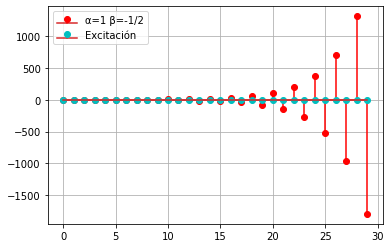

In [42]:
delta = ss.unit_impulse(30)
alpha = [1, 1/2, 5/4]
beta = [-1/2, -1/8, -25/32]
responses = []

for i in range(3):
    b = [0, 0, 1/2]
    a = [1, alpha[i], beta[i]]
    y = my_lfilter(b, a, delta)
    responses.append(y)


plt.stem(np.arange(0, 30), responses[0], 'r', label='α=1 β=-1/2', markerfmt='ro')
plt.stem(np.arange(0, 30), delta, 'c', label='Excitación', markerfmt='co')

plt.grid(True)
plt.legend()

plt.show()

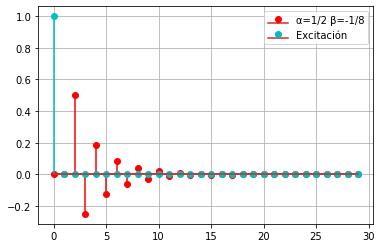

In [43]:
plt.stem(np.arange(0, 30), responses[1], 'r', label='α=1/2 β=-1/8', markerfmt='ro')
plt.stem(np.arange(0, 30), delta, 'c', label='Excitación', markerfmt='co')

plt.grid(True)
plt.legend()

plt.show()

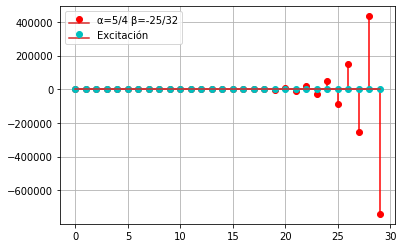

In [44]:
plt.stem(np.arange(0, 30), responses[2], 'r', label='α=5/4 β=-25/32', markerfmt='ro')
plt.stem(np.arange(0, 30), delta, 'c', label='Excitación', markerfmt='co')

plt.grid(True)
plt.legend()

plt.show()

Puede observarse que de las tres combinaciones, solo $ \alpha = 1/2 $ y $ \beta = -1/8 $ presenta estabilidad, y es por lo tanto la única a la cual puede asignársele una frecuencia de oscilación. La misma se estrae de la observación de la simulación, de donde se ve que se tiene un período de $ T = 2 $, y por lo tanto una frecuencia de $ f = 1/2 $.

# $ \color{blue}{\text{EJERCICIO 11}} $
![title](Resources/EJ11/ej11_system.png)

## $ \color{blue}{\text{Ítem a}} $
Del diagrama anterior se extrae la ecuación en diferencias que describe al sistema:
$$ y(nT) = 0.4 \cdot x(nT) + 0.4 \cdot y\left( (n-1)T \right) $$

Se transforma el sistema mediante la transformada $Z$, asumiendo que está originalmente relajado se obtiene:
$$ Y(z) = 0.4 \cdot X(z) + 0.4 \cdot z^{-1} \cdot Y(z) $$
De lo cual se despeja la función transferencia del sistema:
$$ H(z) = \frac{Y(z)}{X(z)} = \frac{z}{\frac{z}{0.4} - 1} $$

Mediante el cambio de variable $ z = e^{j \cdot 2\pi \cdot f T} $ se obtiene la respuesta en frecuencia del sistema:
$$ H(e^{j \cdot 2\pi \cdot f T}) = \frac{ e^{j \cdot 2\pi \cdot f T} }{ \frac{e^{j \cdot 2\pi \cdot f T}}{0.4} - 1 } $$

De la cual se obtiene el módulo, que representa la ganancia del sistema:
$$ \left| H(e^{j \cdot 2\pi \cdot f T}) \right| = \frac{1}{ \sqrt{ \left( \frac{5}{2} \cdot \cos{\left( 2\pi \cdot f T \right)} - 1 \right)^2 + \left( \frac{5}{2} \cdot \sin{\left( 2\pi \cdot f T \right)} \right)^2 } } = \frac{2}{ \sqrt{ 29 - 20 \cdot \cos{\left( 2\pi \cdot f T \right)} } } $$

Mediante las herramientas de *matplotlib* se grafica el resultado obtenido, utilizando como período de muestreo $ T = 1ms $:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
f = np.logspace(0, 2.7, 300)
mag = 2 / (np.sqrt( 29 - 20 * np.cos(2 * np.pi * f * 0.001) ))
mag = 20 * np.log10(mag)

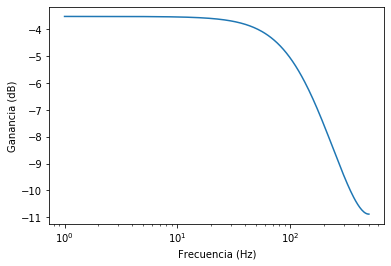

In [18]:
plt.semilogx(f, mag)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.show()

Se corrobora mediante la simulación del sistema utilizando la herramienta *scipy.signal*:

In [19]:
import scipy.signal as ss

In [22]:
n = [0.4, 0]
d = [1, -0.4]
sys = ss.dlti(n, d, dt=0.001)

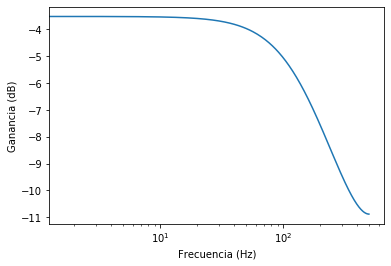

In [23]:
w, mag, phase = sys.bode(n=300)
f = w / (2 * np.pi)
plt.semilogx(f, mag)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.show()

## $ \color{blue}{\text{Ítem b}} $
Haciendo uso de lo ya simulado, se busca el valor de frecuencia para el cual la ganancia disminuye en $ 3dB $:

In [25]:
fc = 0
for i in range(len(f)):
    if (mag[0] - 3) > mag[i]:
        fc = f[i]
        break

print('La frecuencia de corte, donde la ganancia baja 3dB, es de: %.2f Hz' % fc)

La frecuencia de corte, donde la ganancia baja 3dB, es de: 158.33 Hz
